# Data Preparation

In [54]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

## 2.1 Load Data

In [44]:
# load the data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

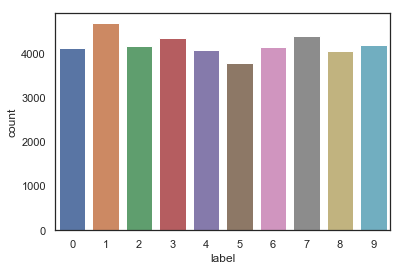

In [45]:
Y_train = train['label']

# Drop 'label' column
X_train = train.drop(labels=['label'], axis=1)

# free some space for memory
del train

g = sns.countplot(Y_train)
Y_train.value_counts()

We have similar counts for the 10 digits

## 2.2 Check for null and missing values

In [46]:
# check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [47]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [48]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

I check for corrupted images (missing values inside).

There is no missing values in the train and test dataset. So we can safely go ahead.

## 2.3 Normalization

In [49]:
X_train = X_train / 255.0
test = test / 255.0

## 2.4 Reshape

In [50]:
# Reshape image in 3 dimensions (height=28px, width=28px, canal=1)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

## 2.5 Label Encoding

In [51]:
# ENcode labels to one hot vectors
Y_train = to_categorical(Y_train, num_classes=10)

## 2.6 Split training and validation set

In [52]:
# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed)

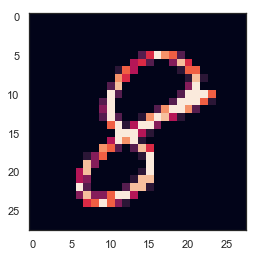

In [53]:
# some examples
g = plt.imshow(X_train[0][:, :, 0])

In [55]:
names = ['X_train', 'Y_train', 'X_val', 'Y_val', 'test']
datas = [X_train, Y_train, X_val, Y_val, test]
for name, data in zip(names, datas):
    with open('./ckpt/{}.pkl'.format(name), mode='wb') as f:
        pickle.dump(data, f)